In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import math
%matplotlib inline

In [2]:
def process_one_team(team_name):
    df = pd.read_csv("../../Data/assists_inside_team/" + team_name + ".csv")
    return df

In [3]:
nba_teams = ["ATL", "BKN", "BOS", "CHA", "CHI", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", 
             "MEM", "MIA", "MIL", "MIN", "NOH", "NYK", "OKC", "ORL", "PHI", "PHX", "POR", "SAC", "SAS", "TOR", 
             "UTA", "WAS"]

In [4]:
df = process_one_team("ATL")
passer_counts = df['Passer'].value_counts()
scorer_counts = df['Scorer'].value_counts()
total_counts = {}
for key in set(scorer_counts.index.tolist() + passer_counts.index.tolist()):
    total_sum = 0
    if key in scorer_counts:
        total_sum += scorer_counts[key]
    if key in passer_counts:
        total_sum += passer_counts[key]
    total_counts[key] = total_sum
sorted_counts = sorted(total_counts.items(), key=operator.itemgetter(1), reverse=True)
sorted_counts = sorted_counts[10:]
keys = [item[0] for item in sorted_counts]
df = df.drop(df[df.Passer.isin(keys)].index)
df = df.drop(df[df.Scorer.isin(keys)].index)

In [5]:
df = df.groupby(["Passer", "Scorer"]).size().reset_index(name="Count")
df = df.pivot(index='Passer', columns='Scorer', values='Count')
for key in df.index.tolist():
    curr_series = df[key]
    for value in curr_series.index.tolist():
        if math.isnan(df[key][value]):
            df[key][value] = 0

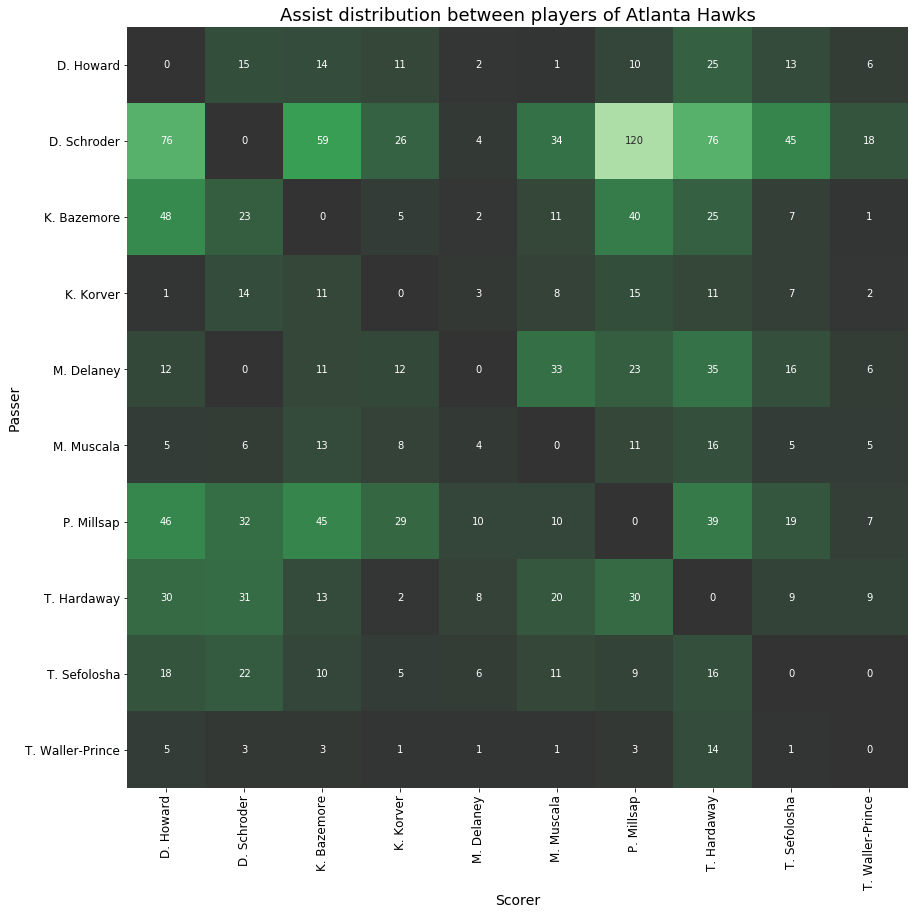

In [58]:
plt.figure(figsize=(14, 14))

plot = sns.heatmap(df, annot=True, fmt="g", cmap=cmap, cbar=False)
y_ticklabels = [tick.get_text() for tick in plot.get_yticklabels()]
x_ticklabels = [tick.get_text() for tick in plot.get_xticklabels()]
plot.set_yticklabels(y_ticklabels, rotation=0, size=12)
plot.set_xticklabels(x_ticklabels, rotation=90, size=12)
plot.set_ylabel(plot.get_ylabel(), size=14)
plot.set_xlabel(plot.get_xlabel(), size=14)
plot.set_title('Assist distribution between players of Atlanta Hawks', size=18)

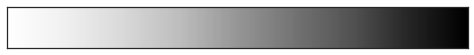

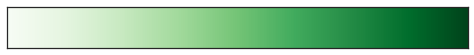

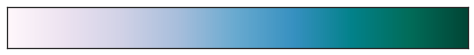

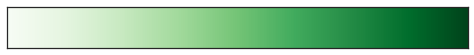

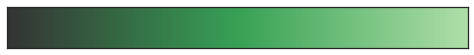

In [57]:
cmap = sns.choose_colorbrewer_palette(as_cmap=True,data_type='s' )
cmap_2 = cmap

In [51]:
atl_cmap = cmap